In [5]:
from sqlalchemy import create_engine
import pandas as pd
import psycopg2

In [7]:
conn = psycopg2.connect(
    host="localhost",
    database="EmployeeSQL",
    user="postgres",
    password="Nada7618!")

In [11]:
data = pd.read_sql("SELECT * FROM salaries", conn)
data1 = pd.read_sql("SELECT * FROM employees", conn)

In [12]:
data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [13]:
data1.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/53,Hideyuki,Zallocco,M,4/28/90
1,475053,e0002,11/18/54,Byong,Delgrande,F,9/7/91
2,57444,e0002,1/30/58,Berry,Babb,F,3/21/92
3,421786,s0001,9/28/57,Xiong,Verhoeff,M,11/26/87
4,282238,e0003,10/28/52,Abdelkader,Baumann,F,1/18/91


In [15]:
merged = pd.merge(data,data1, how= "inner", on= "emp_no")
merged

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,9/2/53,Georgi,Facello,M,6/26/86
1,10001,60117,e0003,9/2/53,Georgi,Facello,M,6/26/86
2,10002,65828,s0001,6/2/64,Bezalel,Simmel,F,11/21/85
3,10002,65828,s0001,6/2/64,Bezalel,Simmel,F,11/21/85
4,10003,40006,e0003,12/3/59,Parto,Bamford,M,8/28/86
...,...,...,...,...,...,...,...,...
600043,499997,49597,e0003,8/3/61,Berhard,Lenart,M,4/21/86
600044,499998,40000,s0001,9/5/56,Patricia,Breugel,M,10/13/93
600045,499998,40000,s0001,9/5/56,Patricia,Breugel,M,10/13/93
600046,499999,63707,e0002,5/1/58,Sachin,Tsukuda,M,11/30/97


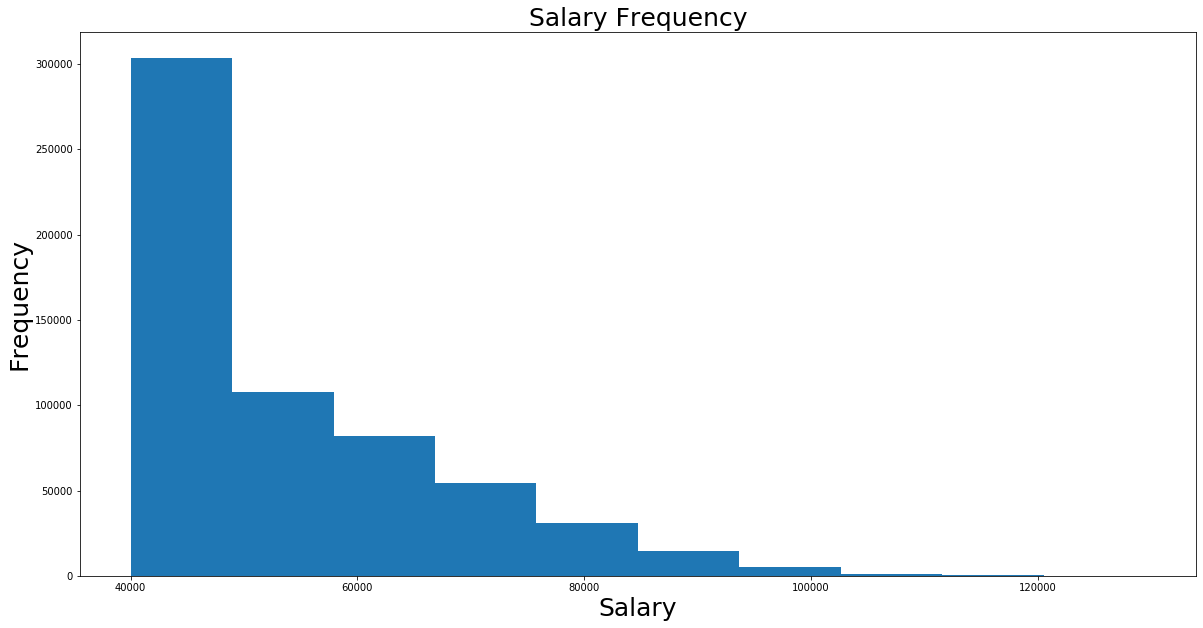

In [26]:
salaries = merged["salary"]
salaries

hist = salaries.plot.hist(figsize = (20,10))
hist.set_xlabel("Salary", fontsize = 25)
hist.set_ylabel("Frequency", fontsize = 25)
hist.set_title("Salary Frequency", fontsize = 25)
fig = hist.get_figure()
fig.savefig('../data/salaryhistogram.png')

In [31]:
salary1 = merged[["salary","emp_title_id"]]
salary2 = salary1.groupby(["emp_title_id"]).mean()
salary2

,salary
emp_title_id,
e0001,48564.434447
e0002,48535.336511
e0003,48506.799871
e0004,48582.896092
m0001,51531.041667
s0001,58465.382850
s0002,58550.172704


Text(0, 0.5, 'Average Salary')

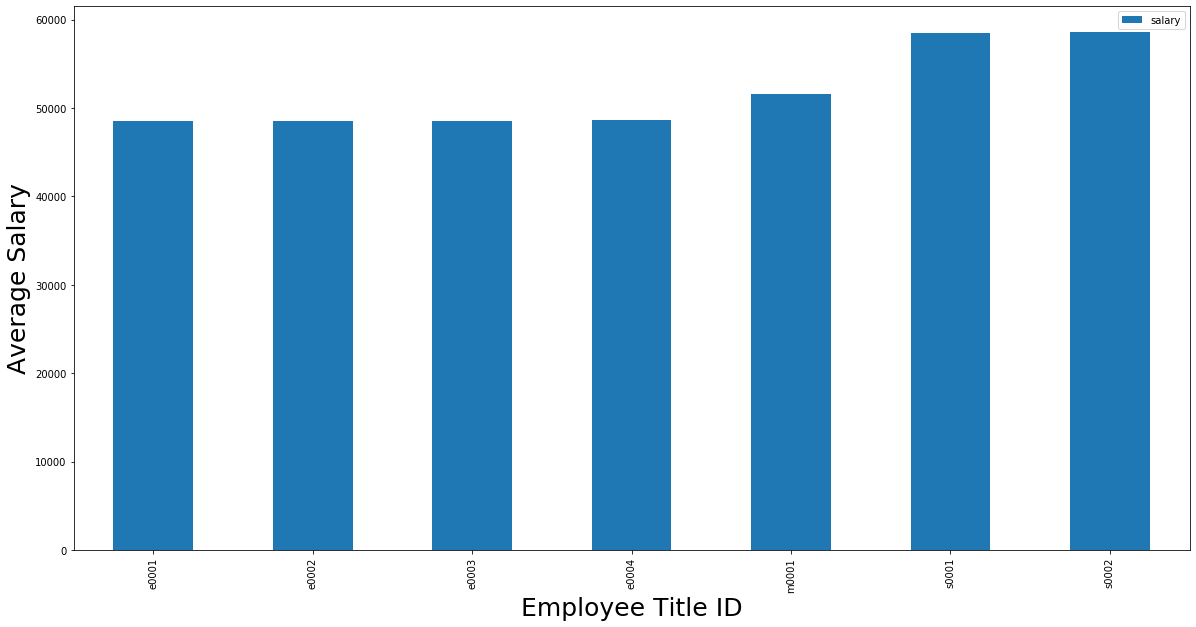

In [38]:
bar = salary2.plot(kind = "bar", figsize = (20,10))
bar.set_xlabel("Employee Title ID", fontsize= 25)
bar.set_ylabel("Average Salary", fontsize = 25)


In [39]:
fig = bar.get_figure()
fig.savefig('../data/averagesalary.png')